# Apprentissage Supervisé: TP2 - A-NN

In [2]:
from sklearn.datasets import fetch_openml
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
import numpy as np
import random
import time
import statistics

## Travail à effectuer
Dans ce TP, nous expérimentons la création de réseaux de neurones artificiels (A-NN) avec divers paramètres.

In [3]:
# Chargement du dataset MNIST
X, Y = fetch_openml('mnist_784', return_X_y = True, as_frame = False) 

# 49000 Données pour l'entrainement
training_data = X[:49000]
training_target = Y[:49000]

# Les autres données sont utilisées pour les tests
test_data = X[49000:]
test_target = Y[49000:]


Classe de l'image: 9


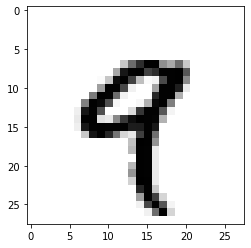

In [3]:
# Test de l'affichage et de la classe de l'image n°4
plt.imshow(X[4].reshape(28, 28), cmap=plt.cm.gray_r,interpolation="nearest")
print(f"Classe de l'image: {Y[4]}")
plt.show() 

In [7]:
# Modèles de classification

# Modèle avec hidden_layer_sizes = (50), soit 1 couche cachée de 50 Neurones
Classifier_50 = MLPClassifier(hidden_layer_sizes =  (50), verbose=True).fit(training_data, training_target)

Iteration 1, loss = 3.51009628
Iteration 2, loss = 1.16751047
Iteration 3, loss = 0.89632935
Iteration 4, loss = 0.72398084
Iteration 5, loss = 0.61059320
Iteration 6, loss = 0.52703117
Iteration 7, loss = 0.46025772
Iteration 8, loss = 0.40018730
Iteration 9, loss = 0.35950189
Iteration 10, loss = 0.33587466
Iteration 11, loss = 0.30308672
Iteration 12, loss = 0.27451445
Iteration 13, loss = 0.25538484
Iteration 14, loss = 0.23905837
Iteration 15, loss = 0.22987177
Iteration 16, loss = 0.21375895
Iteration 17, loss = 0.20267413
Iteration 18, loss = 0.19191688
Iteration 19, loss = 0.18290359
Iteration 20, loss = 0.18259778
Iteration 21, loss = 0.17230423
Iteration 22, loss = 0.16541816
Iteration 23, loss = 0.16046825
Iteration 24, loss = 0.16221343
Iteration 25, loss = 0.15161846
Iteration 26, loss = 0.14553881
Iteration 27, loss = 0.14067155
Iteration 28, loss = 0.13965612
Iteration 29, loss = 0.13633025
Iteration 30, loss = 0.13105706
Iteration 31, loss = 0.13266309
Iteration 32, los

In [8]:
# Prédiction de l'image n°4 du test set avec le modèle entrainé
expected4 = test_target[4]
predicted4 = Classifier_50.predict(test_data)[4]
print(f"Expected class: {expected4}")
print(f"Predicted class of image n°4: {predicted4}")
if expected4 == predicted4:
    print("Success")
else:
    print("Failure")

Expected class: 6
Predicted class of image n°4: 6
Success


In [9]:
# Précision du model sur le test set
accuracy = precision_score(test_target, Classifier_50.predict(test_data), average=None)

print(f"Précision du modèle par label [0-9]: {accuracy}")

Précision du modèle par label [0-9]: [0.96317551 0.97253219 0.95485437 0.93606018 0.94299517 0.95666667
 0.95089937 0.95552561 0.90014065 0.91120608]


In [11]:
# Variation de 10 à 100 couches cachées de 25 neurones chacune

#max (n_hidden_layer, accuracy) tuple
max_accuracy = (0,0)


neuron_number = 25
for i in range(10, 101, 10):
    
    hidden_layer_s = []
    for _ in range (0, i):
        hidden_layer_s.append(neuron_number)
    
    print(f"hidden_layer_size = {len(hidden_layer_s)}", flush=True)
    Classifier_n = MLPClassifier(hidden_layer_sizes =  hidden_layer_s).fit(training_data, training_target)
    accuracy = precision_score(test_target, Classifier_n.predict(test_data), average="micro")
    print(f"Accuracy = {accuracy}")
    if(accuracy > max_accuracy[0]):
        max_accuracy = (accuracy, i)
print(f"Max accuracy: {max_accuracy[0]} for {max_accuracy[1]} hidden layers")

hidden_layer_size = 10
Accuracy = 0.9597619047619048
hidden_layer_size = 20
Accuracy = 0.958047619047619
hidden_layer_size = 30
Accuracy = 0.9521904761904761
hidden_layer_size = 40
Accuracy = 0.7046190476190476
hidden_layer_size = 50
Accuracy = 0.10985714285714286
hidden_layer_size = 60
Accuracy = 0.10985714285714286
hidden_layer_size = 70
Accuracy = 0.10985714285714286
hidden_layer_size = 80
Accuracy = 0.10985714285714286
hidden_layer_size = 90
Accuracy = 0.10985714285714286
hidden_layer_size = 100
Accuracy = 0.10985714285714286
Max accuracy: 0.9597619047619048 for 10 hidden layers


Nous pousons remarquer qu'avec plus de 30 couches cachées de 25 neurones, le model commence à sur-apprendre. Cela veut dire que le model ne reconnait pas les images, mais apprend le training set par coeur. Cela rend donc le modèle inutilisable.

In [4]:
# 5 modèles de classification, avec [1 ; 10] couches cachées
# chacune avec [10 ; 300] neurones (choisis aléatoirement) 

# Nombre de neurones par couche
neuron_number = random.randint(10,300)
print(f"Nombre de neurones par couche: {neuron_number}\n")


# Génération de 5 modèles
Classifier_models = []
for i in range(0,10, 2):
    print(f"Modèle n° {round(i/2 + 1)}", flush=True)
    hidden_layer_s = []
    for j in range (0, i+1):
        hidden_layer_s.append(neuron_number)
    print(f"hidden_layer_size = {len(hidden_layer_s)}", flush=True)
    
    ##### Temps d'apprentissage ####
    start_time = time.time()
    Classifier_n = MLPClassifier(hidden_layer_sizes =  hidden_layer_s).fit(training_data, training_target)
    print(f"-------- Temps d'apprentissage: {time.time() - start_time}s --------")
    ###############
    
    accuracy = precision_score(test_target, Classifier_n.predict(test_data), average="micro")
    Classifier_models.append(Classifier_n)
    print("\n")

Nombre de neurones par couche: 13

Modèle n° 1
hidden_layer_size = 1
-------- Temps d'apprentissage: 44.75517010688782s --------


Modèle n° 2
hidden_layer_size = 3
-------- Temps d'apprentissage: 131.2097761631012s --------


Modèle n° 3
hidden_layer_size = 5


/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-------- Temps d'apprentissage: 155.15372109413147s --------


Modèle n° 4
hidden_layer_size = 7


/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-------- Temps d'apprentissage: 148.73188853263855s --------


Modèle n° 5
hidden_layer_size = 9
-------- Temps d'apprentissage: 171.2417275905609s --------




/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
# Accuracy of the 5 models
i = 1
for Classifier in Classifier_models:
    print(f"--- Modèle {i} ---")
    accuracy = precision_score(test_target, Classifier.predict(test_data), average=None)
    print(f"Accuracy par label [0-9]: {accuracy}")
    print(f"Accuracy moyenne: {statistics.mean(accuracy)}")
    print("----------------\n")
    i += 1

--- Modèle 1 ---
Accuracy par label [0-9]: [0.9275225  0.94317218 0.90696542 0.83778715 0.90557509 0.80683584
 0.87294333 0.93504673 0.82195007 0.87576065]
Accuracy moyenne: 0.8833558951907392
----------------

--- Modèle 2 ---
Accuracy par label [0-9]: [0.93723653 0.97649108 0.91654466 0.89881235 0.93310208 0.8828125
 0.95402299 0.95774648 0.87092329 0.87592251]
Accuracy moyenne: 0.9203614463549521
----------------

--- Modèle 3 ---
Accuracy par label [0-9]: [0.96416627 0.95197978 0.93650047 0.91121076 0.93460621 0.94687327
 0.96658354 0.95392336 0.92166344 0.93482587]
Accuracy moyenne: 0.9422332970436269
----------------

--- Modèle 4 ---
Accuracy par label [0-9]: [0.94228062 0.97963701 0.9088385  0.92741935 0.93288591 0.88634047
 0.95982143 0.93512304 0.90760346 0.93533605]
Accuracy moyenne: 0.9315285842262255
----------------

--- Modèle 5 ---
Accuracy par label [0-9]: [0.93889925 0.97595103 0.93482398 0.90383726 0.94308145 0.92887473
 0.93689788 0.9588015  0.89655172 0.9024976 ]
A

On remarque que le modèle ayant la meilleure accuracy est le modèle est le Modèle 3, avec 5 couches cachées. Cependant, si l'on fait un rapport temps d'apprentissage / performance, le meilleur modèle est le Modèle 1, avec une seule couche cachée (~ 3x moins de temps d'apprentissage que le modèle 3, pour environ 1.06x moins d'accuracy).

In [6]:
# Comparaison des différents algorithmes d'optimisation

# Création des paramètres des modèles

# Séléction du nombre de neurones par couche
neuron_number = random.randint(10,300)
print(f"Nombre de neurones par layer: {neuron_number}\n")

# Remplissage des layers
layer_number = 10
hidden_layer_s = []
for i in range (0, layer_number+1):
    hidden_layer_s.append(neuron_number)


Nombre de neurones par layer: 175



In [7]:
training_times = [0,0,0] # Temps d'entrainements des classifiers

In [8]:
print("L-BFSG Classifier")
start_time = time.time()
Classifier_SGD = MLPClassifier(hidden_layer_sizes =  hidden_layer_s, solver = "lbfgs", verbose=True).fit(training_data, training_target)
training_times[0] = time.time()-start_time

L-BFSG Classifier


/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Le classifier BFSG n'a pas réussit à converger après 200 itérations. L'entrainement est donc stoppé automatiquement pour ne pas avoir un temps d'entrainement excessif.

In [10]:
print("SGD Classifier")
start_time = time.time()
Classifier_SGD = MLPClassifier(hidden_layer_sizes =  hidden_layer_s, solver = "sgd", verbose=True).fit(training_data, training_target)
training_times[1] = time.time()-start_time

SGD Classifier
Iteration 1, loss = 0.59714656
Iteration 2, loss = 0.21687473
Iteration 3, loss = 0.15620524
Iteration 4, loss = 0.12329669
Iteration 5, loss = 0.09890756
Iteration 6, loss = 0.08519185
Iteration 7, loss = 0.06954327
Iteration 8, loss = 0.05926144
Iteration 9, loss = 0.05022173
Iteration 10, loss = 0.04091124
Iteration 11, loss = 0.03381930
Iteration 12, loss = 0.02867593
Iteration 13, loss = 0.02347707
Iteration 14, loss = 0.01843724
Iteration 15, loss = 0.01580756
Iteration 16, loss = 0.01207078
Iteration 17, loss = 0.00834927
Iteration 18, loss = 0.00558848
Iteration 19, loss = 0.00455299
Iteration 20, loss = 0.00412005
Iteration 21, loss = 0.00259151
Iteration 22, loss = 0.00247025
Iteration 23, loss = 0.00184347
Iteration 24, loss = 0.00151774
Iteration 25, loss = 0.00131777
Iteration 26, loss = 0.00120311
Iteration 27, loss = 0.00111151
Iteration 28, loss = 0.00107432
Iteration 29, loss = 0.00101641
Iteration 30, loss = 0.00096908
Iteration 31, loss = 0.00093640
It

In [11]:
print("ADAM Classifier")
start_time = time.time()
Classifier_ADAM = MLPClassifier(hidden_layer_sizes =  hidden_layer_s, solver = "adam", verbose=True).fit(training_data, training_target)
training_times[2] = time.time()-start_time

ADAM Classifier
Iteration 1, loss = 0.43078210
Iteration 2, loss = 0.15306790
Iteration 3, loss = 0.11354987
Iteration 4, loss = 0.09171630
Iteration 5, loss = 0.08023250
Iteration 6, loss = 0.06917666
Iteration 7, loss = 0.06161239
Iteration 8, loss = 0.05692381
Iteration 9, loss = 0.04756749
Iteration 10, loss = 0.04366743
Iteration 11, loss = 0.04102061
Iteration 12, loss = 0.04535244
Iteration 13, loss = 0.03911469
Iteration 14, loss = 0.03645076
Iteration 15, loss = 0.02917702
Iteration 16, loss = 0.03654315
Iteration 17, loss = 0.03598135
Iteration 18, loss = 0.02728245
Iteration 19, loss = 0.03045743
Iteration 20, loss = 0.03104707
Iteration 21, loss = 0.03074825
Iteration 22, loss = 0.02201815
Iteration 23, loss = 0.03362259
Iteration 24, loss = 0.03068065
Iteration 25, loss = 0.02587434
Iteration 26, loss = 0.02185822
Iteration 27, loss = 0.01966379
Iteration 28, loss = 0.02234761
Iteration 29, loss = 0.01922309
Iteration 30, loss = 0.02040709
Iteration 31, loss = 0.02275785
I